In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn import preprocessing 
import seaborn as sns

In [2]:
# Read in data
filepath = '/Users/maureenkeenan/Desktop/Kaggle/Titanic'
file_train = 'train.csv'
file_test = 'test.csv'
sample = pd.read_csv(os.path.join(filepath,file_train))
data = pd.read_csv(os.path.join(filepath,file_test))

In [3]:
# Explore data
sample.describe()
sample.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
y = sample.Survived # What we are fitting for
sample.groupby('Survived').Survived.count()

Survived
0    549
1    342
Name: Survived, dtype: int64

In [5]:
import nbimporter
import DataCleanup as dc

Importing Jupyter notebook from DataCleanup.ipynb


In [6]:
dc.transform_features(sample)

DataCleanup.ipynb:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "        title.append(tmp[-1].split('.')[0]) #or to combine use regexp and search\n",


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,Student,1,0,A/5 21171,First,N,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,Fourth,C,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,Young Adult,0,0,STON/O2. 3101282,First,N,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Young Adult,1,0,113803,Fourth,C,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,Young Adult,0,0,373450,Second,N,S,Mr
5,6,0,3,"Moran, Mr. James",male,Unknown,0,0,330877,Second,N,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,Adult,0,0,17463,Fourth,E,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",child,Baby,3,1,349909,Third,N,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,Young Adult,0,2,347742,Second,N,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,Teenager,1,0,237736,Third,N,C,Mrs


In [30]:
[sample, feature_mappings] = dc.encode_features(sample)

In [39]:
# Do a quick subset of features
quick_features = ['Sex','Fare','Parch']
X = sample[quick_features]
y = sample.Survived

In [40]:
# Split into train and test (here the cv)
from sklearn.model_selection import train_test_split

num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = num_test)

In [41]:
print('The size of X is: ',len(X))
print('The size of train is: ',len(X_train))
print('The size of test is: ',len(X_test))

The size of X is:  891
The size of train is:  712
The size of test is:  179


In [42]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='lbfgs')

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [43]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[90, 19],
       [16, 54]])

In [44]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred).round(2))
print("Precision:",metrics.precision_score(y_test, y_pred).round(2))
print("Recall:",metrics.recall_score(y_test, y_pred).round(2))

Accuracy: 0.8
Precision: 0.74
Recall: 0.77


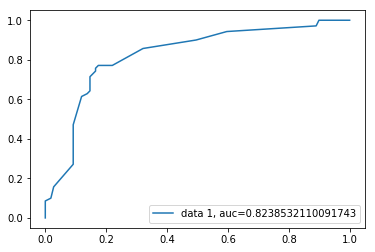

In [45]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()